In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv(r"C:\Users\91813\Downloads\archive (13)\Mall_Customers.csv")

In [18]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
df.shape

(200, 5)

In [20]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.drop('CustomerID',axis=1,inplace=True)

In [23]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [24]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values


In [25]:
df.duplicated().sum()

0

No duplicates

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

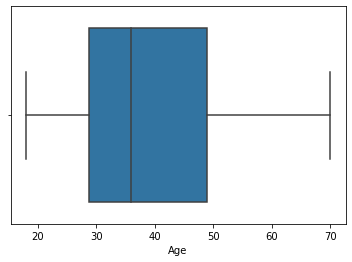

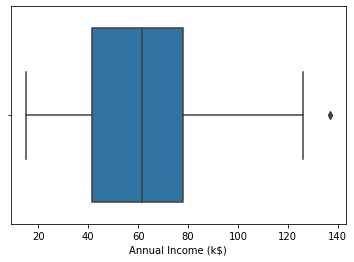

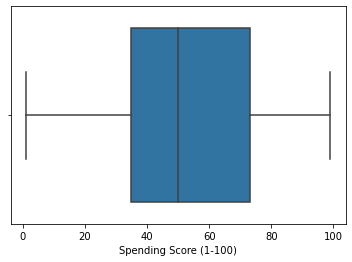

In [27]:
for i in df.select_dtypes(include=['int','float']):
    sns.boxplot(df[i])
    plt.show()

Annual Income has only some outlier so we are not considering

## Visualization

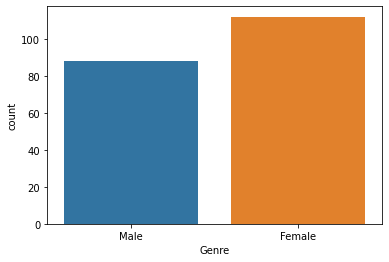

In [29]:
sns.countplot(x='Genre',data=df)
plt.show()

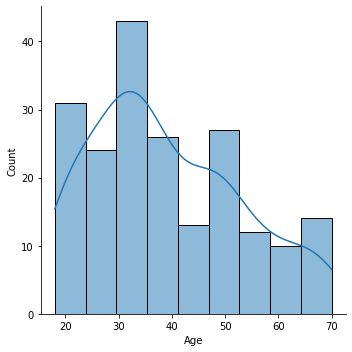

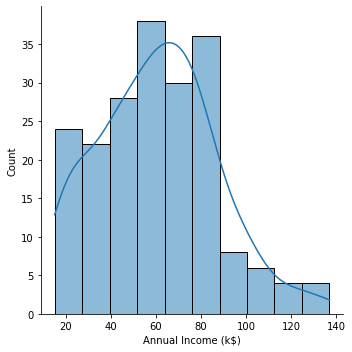

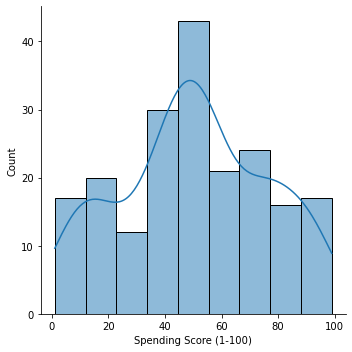

In [32]:
for i in df.select_dtypes(include=['int','float']):
    sns.displot(df[i],kde=True)

Most of the customers got the score ranging between 40 to 60

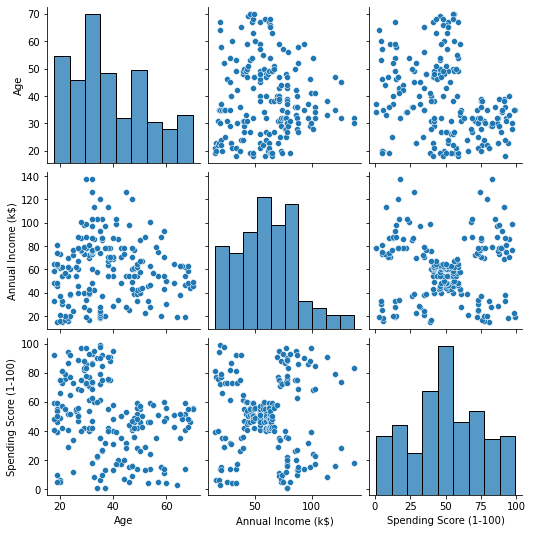

In [35]:
sns.pairplot(df)
plt.show()

In [36]:
df.skew()

Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
labelencoder=LabelEncoder()

In [42]:
df['Genre']=labelencoder.fit_transform(df['Genre'])

In [43]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Modeling

In [44]:
from sklearn.cluster import KMeans

In [45]:
sum_of_squared_distance = []
for n in range(1,12):
    kmeans = KMeans(n_clusters=n, max_iter=50)
    kmeans.fit(df)
    sum_of_squared_distance.append(kmeans.inertia_)

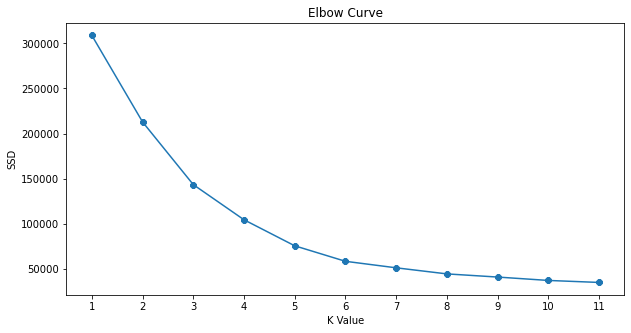

In [49]:
plt.figure(figsize=(10,5))
plt.plot(range(1,12),sum_of_squared_distance, marker ="8")
plt.title("Elbow Curve")
plt.xlabel("K Value")
plt.xticks(np.arange(1,12,1))
plt.ylabel("SSD")
plt.show()

No of clusters=5


In [51]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(df)

KMeans(max_iter=50, n_clusters=5)

In [56]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [55]:
df['cluster']=kmeans.labels_
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


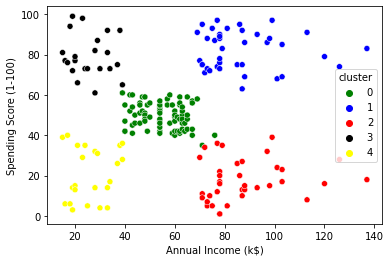

In [63]:
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster',palette=['Green','blue','red','black','yellow'])
plt.show()